In [1]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers.pipelines.pt_utils import KeyDataset
from datasets import load_dataset
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import torch 
import torch.nn.functional as F
import io
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import os
import re
import datetime

# Sentimental Analysis

## https://www.youtube.com/watch?v=GSt00_-0ncQ used this youtube video

["best_products_for_sentimental_***.csv", "electronics_for_sentimental.csv", "gym_equipment_for_sentimental.csv", "health_care_for_sentimental.csv"])

In [2]:
# setting the path for joining multiple files
files = os.path.join("../Cleaned_&_Sentimental_csv/", "best_products_for_sentimental_***.csv")

# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)

Resultant CSV after joining all CSV files at a particular location...
                                                 Product  Category_x  Price_x  \
0      Celebrations Chocolate Bulk Box, Chocolate Gif...     grocery    12.99   
1      Celebrations Chocolate Bulk Box, Chocolate Gif...     grocery    12.99   
2      Celebrations Chocolate Bulk Box, Chocolate Gif...     grocery    12.99   
3      Celebrations Chocolate Bulk Box, Chocolate Gif...     grocery    12.99   
4      Celebrations Chocolate Bulk Box, Chocolate Gif...     grocery    12.99   
...                                                  ...         ...      ...   
45665  Hotpoint Washing Machine Drum Paddle Lifter Pa...  appliances     5.00   
45666  Hotpoint Washing Machine Drum Paddle Lifter Pa...  appliances     5.00   
45667  Hotpoint Washing Machine Drum Paddle Lifter Pa...  appliances     5.00   
45668  Hotpoint Washing Machine Drum Paddle Lifter Pa...  appliances     5.00   
45669  Hotpoint Washing Machine Drum Pa

In [3]:
df_2 = pd.concat(map(pd.read_csv, [ "..\Cleaned_&_Sentimental_csv\electronics_for_sentimental.csv", "../Cleaned_&_Sentimental_csv/auto_for_sentimental.csv", "../Cleaned_&_Sentimental_csv/gym_equipment_for_sentimental.csv", "..\Cleaned_&_Sentimental_csv\health_care_for_sentimental.csv"]), ignore_index=True)

In [9]:
df

,Product,Category_x,Price_x,Individual Review,Location,Date,Review,Helpful
0,"Celebrations Chocolate Bulk Box, Chocolate Gif...",grocery,12.99,1.0,United Kingdom,2019-12-25,\n Bought these as like many we buy out sweet...,20
1,"Celebrations Chocolate Bulk Box, Chocolate Gif...",grocery,12.99,5.0,United Kingdom,2020-05-21,"Long time eater of chocolate, third time purch...",3
2,"Celebrations Chocolate Bulk Box, Chocolate Gif...",grocery,12.99,4.0,United Kingdom,2019-12-07,\n This product was good value for me because...,6
3,"Celebrations Chocolate Bulk Box, Chocolate Gif...",grocery,12.99,1.0,United Kingdom,2020-05-11,\n Received my order Sat. Thought heck of a b...,8
4,"Celebrations Chocolate Bulk Box, Chocolate Gif...",grocery,12.99,5.0,United Kingdom,2019-12-17,Bought these as I needed to fill a pinata for ...,1
...,...,...,...,...,...,...,...,...
45665,Hotpoint Washing Machine Drum Paddle Lifter Pa...,appliances,5.00,5.0,United Kingdom,2020-01-08,"\n Excellent price, so easy to fit, quick del...",0
45666,Hotpoint Washing Machine Drum Paddle Lifter Pa...,appliances,5.00,5.0,United Kingdom,2019-12-24,\n Great\n,0
45667,Hotpoint Washing Machine Drum Paddle Lifter Pa...,appliances,5.00,5.0,United Kingdom,2020-07-16,\n Spare part for washing machine.\n,0
45668,Hotpoint Washing Machine Drum Paddle Lifter Pa...,appliances,5.00,5.0,United Kingdom,2020-02-25,\n Great value easy to fit\n,0


In [10]:
df_2

,Product,Category,Price,Individual Review,Location,Date,Review,Helpful
0,Snap Circuits Beginner Electronics Discovery K...,Electronics,25.99,5.0,Canada,2020-06-26,Mes fils adorent. Très bonne qualité et foncti...,0
1,Snap Circuits Beginner Electronics Discovery K...,Electronics,25.99,5.0,Canada,2020-01-17,This was suggested as STEM gift for a 5-year o...,0
2,Snap Circuits Beginner Electronics Discovery K...,Electronics,25.99,5.0,Canada,2020-01-02,Enjoyed by 7 year old,0
3,Snap Circuits Beginner Electronics Discovery K...,Electronics,25.99,5.0,Canada,2020-05-13,Gave this as a gift to a very bright 7 year ol...,0
4,Snap Circuits Beginner Electronics Discovery K...,Electronics,25.99,3.0,United States,2020-05-11,My daughter Loved this!! She is 4.5 and I am u...,3
...,...,...,...,...,...,...,...,...
26561,"The 6-Minute Diary Pure | Gratitude Journal, M...",Health Care,NaN,5.0,United Kingdom,2019-12-11,Nicely printed. Easy to use :),0
26562,"The 6-Minute Diary Pure | Gratitude Journal, M...",Health Care,NaN,5.0,United Kingdom,2020-01-28,"I have had the 6 minute diary twice now, also ...",0
26563,"The 6-Minute Diary Pure | Gratitude Journal, M...",Health Care,NaN,5.0,United Kingdom,2020-01-02,This diary has helped through some difficult t...,0
26564,"The 6-Minute Diary Pure | Gratitude Journal, M...",Health Care,NaN,5.0,United Kingdom,2020-06-22,Follow up from the 6 minute original Diary. Ve...,0


In [4]:
df.dtypes, df_2.dtypes

(Product               object
 Category_x            object
 Price_x              float64
 Individual Review    float64
 Location              object
 Date                  object
 Review                object
 Helpful                int64
 dtype: object,
 Product               object
 Category              object
 Price                float64
 Individual Review    float64
 Location              object
 Date                  object
 Review                object
 Helpful                int64
 dtype: object)

In [5]:
df_all = pd.concat([df, df_2])
df_all

,Product,Category_x,Price_x,Individual Review,Location,Date,Review,Helpful,Category,Price
0,"Celebrations Chocolate Bulk Box, Chocolate Gif...",grocery,12.99,1.0,United Kingdom,2019-12-25,\n Bought these as like many we buy out sweet...,20,NaN,NaN
1,"Celebrations Chocolate Bulk Box, Chocolate Gif...",grocery,12.99,5.0,United Kingdom,2020-05-21,"Long time eater of chocolate, third time purch...",3,NaN,NaN
2,"Celebrations Chocolate Bulk Box, Chocolate Gif...",grocery,12.99,4.0,United Kingdom,2019-12-07,\n This product was good value for me because...,6,NaN,NaN
3,"Celebrations Chocolate Bulk Box, Chocolate Gif...",grocery,12.99,1.0,United Kingdom,2020-05-11,\n Received my order Sat. Thought heck of a b...,8,NaN,NaN
4,"Celebrations Chocolate Bulk Box, Chocolate Gif...",grocery,12.99,5.0,United Kingdom,2019-12-17,Bought these as I needed to fill a pinata for ...,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
26561,"The 6-Minute Diary Pure | Gratitude Journal, M...",NaN,NaN,5.0,United Kingdom,2019-12-11,Nicely printed. Easy to use :),0,Health Care,NaN
26562,"The 6-Minute Diary Pure | Gratitude Journal, M...",NaN,NaN,5.0,United Kingdom,2020-01-28,"I have had the 6 minute diary twice now, also ...",0,Health Care,NaN
26563,"The 6-Minute Diary Pure | Gratitude Journal, M...",NaN,NaN,5.0,United Kingdom,2020-01-02,This diary has helped through some difficult t...,0,Health Care,NaN
26564,"The 6-Minute Diary Pure | Gratitude Journal, M...",NaN,NaN,5.0,United Kingdom,2020-06-22,Follow up from the 6 minute original Diary. Ve...,0,Health Care,NaN


In [6]:
df_all["Category"].value_counts()

Health Care    9966
Auto           7580
Electronics    6211
Gym            2809
Name: Category, dtype: int64

In [7]:
df_all = df_all.reset_index(drop=True)

In [8]:
df_all

,Product,Category_x,Price_x,Individual Review,Location,Date,Review,Helpful,Category,Price
0,"Celebrations Chocolate Bulk Box, Chocolate Gif...",grocery,12.99,1.0,United Kingdom,2019-12-25,\n Bought these as like many we buy out sweet...,20,NaN,NaN
1,"Celebrations Chocolate Bulk Box, Chocolate Gif...",grocery,12.99,5.0,United Kingdom,2020-05-21,"Long time eater of chocolate, third time purch...",3,NaN,NaN
2,"Celebrations Chocolate Bulk Box, Chocolate Gif...",grocery,12.99,4.0,United Kingdom,2019-12-07,\n This product was good value for me because...,6,NaN,NaN
3,"Celebrations Chocolate Bulk Box, Chocolate Gif...",grocery,12.99,1.0,United Kingdom,2020-05-11,\n Received my order Sat. Thought heck of a b...,8,NaN,NaN
4,"Celebrations Chocolate Bulk Box, Chocolate Gif...",grocery,12.99,5.0,United Kingdom,2019-12-17,Bought these as I needed to fill a pinata for ...,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
72231,"The 6-Minute Diary Pure | Gratitude Journal, M...",NaN,NaN,5.0,United Kingdom,2019-12-11,Nicely printed. Easy to use :),0,Health Care,NaN
72232,"The 6-Minute Diary Pure | Gratitude Journal, M...",NaN,NaN,5.0,United Kingdom,2020-01-28,"I have had the 6 minute diary twice now, also ...",0,Health Care,NaN
72233,"The 6-Minute Diary Pure | Gratitude Journal, M...",NaN,NaN,5.0,United Kingdom,2020-01-02,This diary has helped through some difficult t...,0,Health Care,NaN
72234,"The 6-Minute Diary Pure | Gratitude Journal, M...",NaN,NaN,5.0,United Kingdom,2020-06-22,Follow up from the 6 minute original Diary. Ve...,0,Health Care,NaN


In [120]:
prob = df_all[df_all["Review"].isna()]

In [121]:
prob

,Product,Category,Price,Individual Review,Location,Date,Review,Helpful


In [126]:
dataset = df_all["Review"].tolist()
dataset

['\n  Why the change of price for those of us who regularly buy this sort of amount of toilet rolls, especially when the price increase is due to a totally unnecessary demand from overbuying clowns panicking about T Rolls which are entirely unrelated to the obvious, current situation.To be not told, and supposed to guess the price is not good enough and to be at the mercy of, as I say, this ridiculous over buying by the panic squad, and the supplies of this item. What happens 6 months from now when they are no longer buying and I am, so I deserve the usual old price and not some overpriced item caused by the panic squad with more money than sense.Please rebate for those of us not causing the panicking and not liable for price increases like this.\n',
 'I never thought that I still need to read any reviews when I was buying this Andrex toilet paper that I have been used for many years.\n\nJust like others bad comments and photo upload, the size of this Andrex toilet paper is extremely s

In [127]:
model_name = "distilbert-base-uncased-finetuned-sst-2-english"

model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name, truncation = True, padding = True, max_length = 512)

### For creating pipeline

In [128]:
classifier = pipeline("sentiment-analysis", model=model_name, tokenizer = tokenizer, device = 0, truncation=True)

#results = classifier(dataset)
#results = classifier(df_covd_dates['Review'])
#for result in results(KeyDataset(dataset), batch_size = 8):
#    print(result)

In [129]:
results = classifier(dataset)

In [125]:
encoded = tokenizer(dataset, truncation = True)

desired_output = []
for word_id in encoded.word_ids():
    if word_id is not None:
        start, end = encoded.word_to_tokens(word_id)
        if start == end - 1:
            tokens = [start]
        else:
            tokens = [start, end-1]
        if len(desired_output) == 0 or desired_output[-1] != tokens:
            desired_output.append(tokens)
desired_output

Token indices sequence length is longer than the specified maximum sequence length for this model (532 > 512). Running this sequence through the model will result in indexing errors


[[1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34, 36],
 [37, 38],
 [39, 40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [54],
 [55],
 [56],
 [57],
 [58],
 [59],
 [60],
 [61],
 [62],
 [63],
 [64],
 [65],
 [66],
 [67],
 [68],
 [69],
 [70],
 [71],
 [72],
 [73],
 [74],
 [75],
 [76],
 [77],
 [78],
 [79],
 [80],
 [81],
 [82],
 [83],
 [84],
 [85],
 [86],
 [87],
 [88],
 [89],
 [90],
 [91],
 [92],
 [93],
 [94],
 [95],
 [96],
 [97],
 [98],
 [99],
 [100],
 [101],
 [102],
 [103],
 [104],
 [105],
 [106],
 [107],
 [108],
 [109],
 [110],
 [111],
 [112],
 [113],
 [114],
 [115],
 [116],
 [117],
 [118],
 [119],
 [120],
 [121],
 [122],
 [123],
 [124, 127],
 [128],
 [129],
 [130],
 [131],
 [132],
 [133],
 [134],
 [135],
 [136],
 [137],
 [138],
 [139],
 [140],
 [141, 142],
 [143],
 [

In [130]:
results

[{'label': 'NEGATIVE', 'score': 0.9997300505638123},
 {'label': 'NEGATIVE', 'score': 0.9988887906074524},
 {'label': 'NEGATIVE', 'score': 0.9979450106620789},
 {'label': 'NEGATIVE', 'score': 0.9989913105964661},
 {'label': 'NEGATIVE', 'score': 0.9990931749343872},
 {'label': 'NEGATIVE', 'score': 0.999521017074585},
 {'label': 'NEGATIVE', 'score': 0.9996353387832642},
 {'label': 'NEGATIVE', 'score': 0.9998002648353577},
 {'label': 'NEGATIVE', 'score': 0.9443013072013855},
 {'label': 'NEGATIVE', 'score': 0.9995766282081604},
 {'label': 'NEGATIVE', 'score': 0.9972207546234131},
 {'label': 'POSITIVE', 'score': 0.9969725608825684},
 {'label': 'POSITIVE', 'score': 0.9971966743469238},
 {'label': 'NEGATIVE', 'score': 0.9996806383132935},
 {'label': 'POSITIVE', 'score': 0.8221409320831299},
 {'label': 'NEGATIVE', 'score': 0.9861246347427368},
 {'label': 'NEGATIVE', 'score': 0.9958950281143188},
 {'label': 'NEGATIVE', 'score': 0.998909592628479},
 {'label': 'NEGATIVE', 'score': 0.99963772296905

In [131]:
df_sentimental= pd.DataFrame (results)

In [132]:
df_sentimental

,label,score
0,NEGATIVE,0.999730
1,NEGATIVE,0.998889
2,NEGATIVE,0.997945
3,NEGATIVE,0.998991
4,NEGATIVE,0.999093
...,...,...
149034,POSITIVE,0.999792
149035,POSITIVE,0.999338
149036,POSITIVE,0.999745
149037,POSITIVE,0.997507


# Merge sentimental and products

In [140]:
df_sentimental_with_products = []
df_sentimental_with_products = df_all
df_sentimental_with_products = df_sentimental_with_products.join(df_sentimental)
df_sentimental_with_products

,Product,Category,Price,Individual Review,Location,Date,Review,Helpful,label,score
0,Andrex Gentle Clean Toilet Tissue,nan,0,2.0,United Kingdom,2020-03-19,\n Why the change of price for those of us wh...,2,NEGATIVE,0.999730
1,Andrex Gentle Clean Toilet Tissue,nan,0,1.0,United Kingdom,2020-05-30,I never thought that I still need to read any ...,3,NEGATIVE,0.998889
2,Andrex Gentle Clean Toilet Tissue,nan,0,1.0,United Kingdom,2020-01-05,\n We brought Andrex multi on a few occasions...,2,NEGATIVE,0.997945
3,Andrex Gentle Clean Toilet Tissue,nan,0,1.0,United Kingdom,2020-03-09,"\n Disappointed in these thinned out, less de...",2,NEGATIVE,0.998991
4,Andrex Gentle Clean Toilet Tissue,nan,0,1.0,United Kingdom,2020-06-24,\n This product sums up the pitfalls of buyin...,2,NEGATIVE,0.999093
...,...,...,...,...,...,...,...,...,...,...
149034,"The 6-Minute Diary Pure | Gratitude Journal, M...",Health Care,NaN,5,United Kingdom,2019-12-11,Nicely printed. Easy to use :),0,POSITIVE,0.999792
149035,"The 6-Minute Diary Pure | Gratitude Journal, M...",Health Care,NaN,5,United Kingdom,2020-01-28,"I have had the 6 minute diary twice now, also ...",0,POSITIVE,0.999338
149036,"The 6-Minute Diary Pure | Gratitude Journal, M...",Health Care,NaN,5,United Kingdom,2020-01-02,This diary has helped through some difficult t...,0,POSITIVE,0.999745
149037,"The 6-Minute Diary Pure | Gratitude Journal, M...",Health Care,NaN,5,United Kingdom,2020-06-22,Follow up from the 6 minute original Diary. Ve...,0,POSITIVE,0.997507


In [146]:
df_group = df_sentimental_with_products.groupby(["Date", "label", "Category"]).count()

In [147]:
df_group

Product  Price  Individual Review  Location  \
Date       label    Category                                                   
2019-12-02 NEGATIVE Auto               9      9                  9         9   
                    Electronics        3      2                  3         3   
                    nan               71     71                 71        71   
           POSITIVE Auto              17     17                 17        17   
                    Electronics        4      2                  4         4   
...                                  ...    ...                ...       ...   
2020-08-01 POSITIVE Auto              20     20                 20        20   
                    Electronics       16      7                 16        16   
                    Gym                3      2                  3         3   
                    Health Care       16      4                 16        16   
                    nan              322    322                322       322   

                                 Review  Helpful  score  
Date       label    Category                             
2019-12-02 NEGATIVE Auto              9        9      9  
                    Electronics       3        3      3  
                    nan              71       71     71  
           POSITIVE Auto             17       17     17  
                    Electronics       4        4      4  
...                                 ...      ...    ...  
2020-08-01 POSITIVE Auto             20       20     20  
                    Electronics      16       16     16  
                    Gym               3        3      3  
                    Health Care      16       16     16  
                    nan             322      322    322  

[2389 rows x 7 columns]

In [148]:
df_group.describe()

,Product,Price,Individual Review,Location,Review,Helpful,score
count,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000
mean,62.385517,59.265383,62.385517,62.385517,62.385517,62.385517,62.385517
std,113.589400,114.733140,113.589400,113.589400,113.589400,113.589400,113.589400
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000
50%,14.000000,10.000000,14.000000,14.000000,14.000000,14.000000,14.000000
75%,34.000000,26.000000,34.000000,34.000000,34.000000,34.000000,34.000000
max,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000


<Figure size 2160x1152 with 0 Axes>

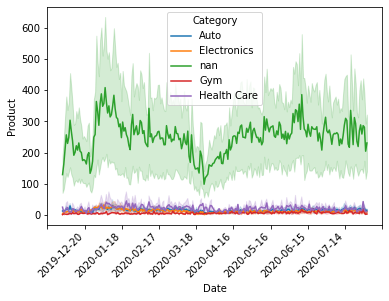

<Figure size 2160x1152 with 0 Axes>

In [152]:
sns.lineplot(data=df_group, x = "Date", y= "Product",  hue = "Category" )
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.LinearLocator(10))
plt.xticks(rotation=45, ha='right')
plt.figure(figsize = (30,16))

<Figure size 2160x1152 with 0 Axes>

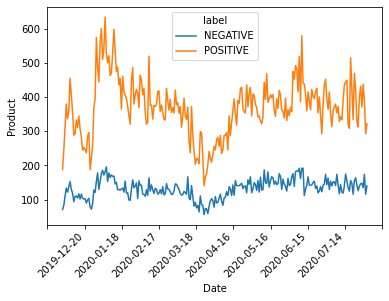

<Figure size 2160x1152 with 0 Axes>

In [49]:
sns.lineplot(data=df_group, x = "Date", y= "Product",  hue = "label")
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.LinearLocator(10))
plt.xticks(rotation=45, ha='right')
plt.figure(figsize = (30,16))